In [9]:
data_path = "../../raw/AITEX.csv"

In [10]:
from matplotlib import pyplot as plt

import pandas as pd

In [11]:
df = pd.read_csv(data_path,sep=';')

In [12]:
import numpy as np
def fractofloat(x):
    
    try:
        x,y = x.split('/')
        return float(x)/float(y)
    except:
        return np.nan
    
df["L/D"] = df["L/D"].apply(fractofloat)

def sandtomin(x,ind):
    try:
        x,y = x.split('-')
        if ind == 0:
            return float(x)
        else:
            return float(y)
    except:
        return np.nan
    
df["Sand size min (um)"] = df["Sand size (um)"].apply(lambda x: sandtomin(x,1))
df["Sand size max (um)"] = df["Sand size (um)"].apply(lambda x: sandtomin(x,0))
df.pop("Sand size (um)")


0          NaN
1      500-850
2      500-850
3      500-850
4      500-850
        ...   
417    355-500
418    355-500
419    355-500
420    355-500
421    355-500
Name: Sand size (um), Length: 422, dtype: object

array([[<Axes: title={'center': 'Nº holes / Nº filaments'}>,
        <Axes: title={'center': 'Diameter (mm)'}>,
        <Axes: title={'center': 'L/D'}>,
        <Axes: title={'center': 'Filter (um)'}>,
        <Axes: title={'center': 'Sand quantity (cm)'}>,
        <Axes: title={'center': 'Support'}>],
       [<Axes: title={'center': 'Vpump (rpm)'}>,
        <Axes: title={'center': 'Vext (rpm)'}>,
        <Axes: title={'center': 'TE1 (°C)'}>,
        <Axes: title={'center': 'TE2 (°C)'}>,
        <Axes: title={'center': 'TE3 (°C)'}>,
        <Axes: title={'center': 'TE4 (°C)'}>],
       [<Axes: title={'center': 'TD(°C)'}>,
        <Axes: title={'center': 'PD(bar)'}>,
        <Axes: title={'center': 'PE(bar)'}>,
        <Axes: title={'center': 'VTO (m/min)'}>,
        <Axes: title={'center': 'VG1(m/min)'}>,
        <Axes: title={'center': 'VG2(m/min)'}>],
       [<Axes: title={'center': 'VG3(m/min)'}>,
        <Axes: title={'center': 'VG4(m/min)'}>,
        <Axes: title={'center': 'Vwind

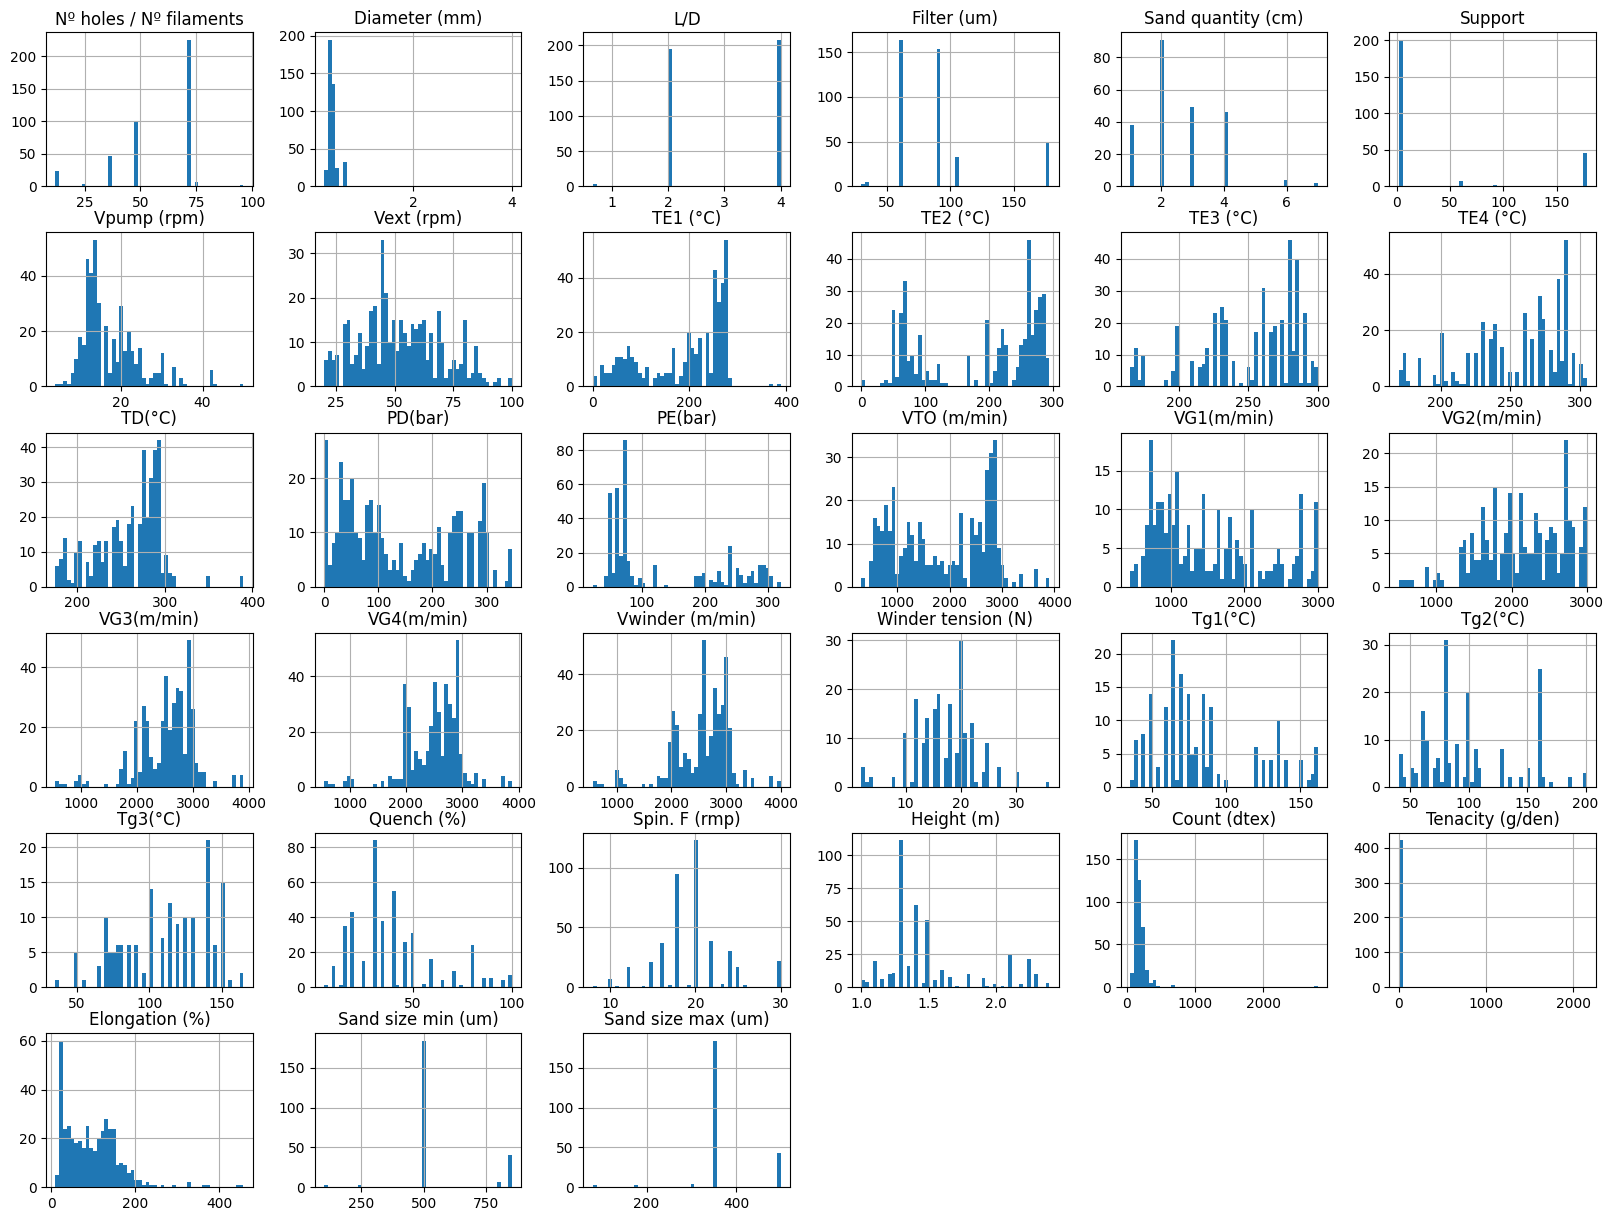

In [13]:
# histogram of the data
df.hist(bins=50, figsize=(20,15))

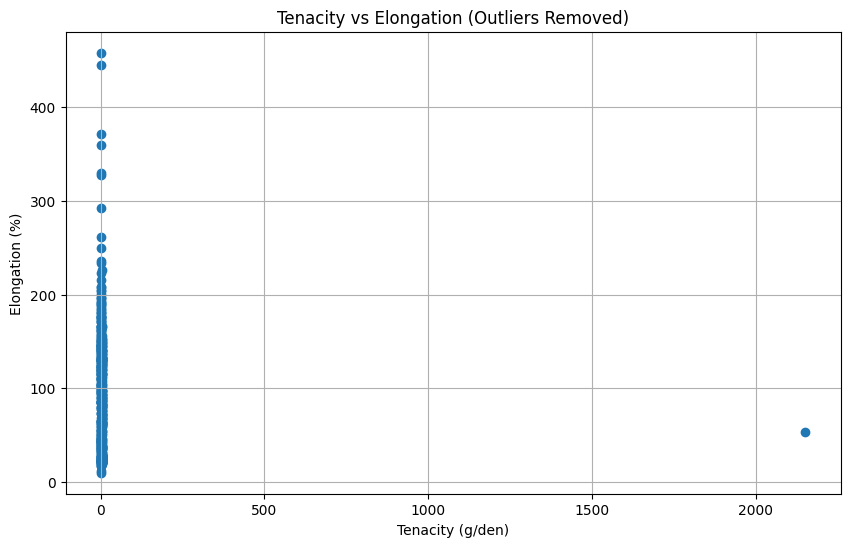

In [14]:

# Plot the cleaned data for comparison
plt.figure(figsize=(10, 6))


plt.scatter(df['Tenacity (g/den)'], df['Elongation (%)'])
plt.title("Tenacity vs Elongation (Outliers Removed)")
plt.xlabel("Tenacity (g/den)")
plt.ylabel("Elongation (%)")
plt.grid(True)
plt.show()

In [15]:
# Define a function to remove outliers based on standard deviation
def remove_outliers_std(data, columns, threshold=3):
    for col in columns:
        mean = data[col].mean()
        std_dev = data[col].std()
        data = data[(data[col] >= mean - threshold * std_dev) & (data[col] <= mean + threshold * std_dev)]
    return data

# Apply outlier removal on 'PERF_Tenacity(g/den)' and 'PERF_Elongation (pc)' based on 3 standard deviations

df["Tenacity (g/den)"]
df["Elongation (%)"]
df["Diameter (mm)"]
cleaned_data = remove_outliers_std(df, ['Tenacity (g/den)', 'Elongation (%)',"Count (dtex)","Diameter (mm)"])



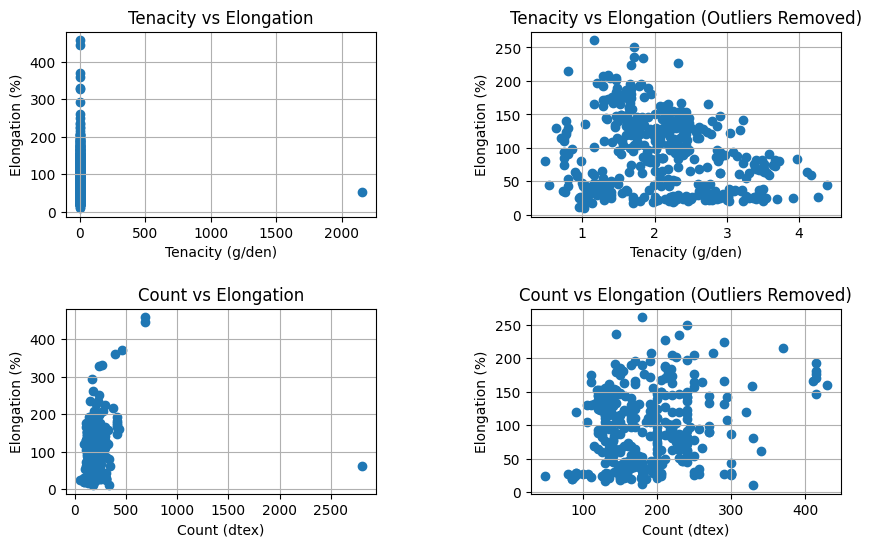

In [16]:

# Plot the cleaned data for comparison
plt.figure(figsize=(10, 6))
# padding
plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.subplot(2, 2, 1)
plt.scatter(df['Tenacity (g/den)'], df['Elongation (%)'])
plt.title("Tenacity vs Elongation")
plt.xlabel("Tenacity (g/den)")
plt.ylabel("Elongation (%)")
plt.grid(True)

plt.subplot(2, 2, 2)
# Plot the cleaned data for comparison
plt.scatter(cleaned_data['Tenacity (g/den)'], cleaned_data['Elongation (%)'])
plt.title("Tenacity vs Elongation (Outliers Removed)")
plt.xlabel("Tenacity (g/den)")
plt.ylabel("Elongation (%)")
plt.grid(True)

plt.subplot(2, 2, 3)
plt.scatter(df['Count (dtex)'], df['Elongation (%)'])
plt.title("Count vs Elongation")
plt.xlabel("Count (dtex)")
plt.ylabel("Elongation (%)")
plt.grid(True)

plt.subplot(2, 2, 4)
# Plot the cleaned data for comparison
plt.scatter(cleaned_data['Count (dtex)'], cleaned_data['Elongation (%)'])
plt.title("Count vs Elongation (Outliers Removed)")
plt.xlabel("Count (dtex)")
plt.ylabel("Elongation (%)")

plt.grid(True)

In [17]:
df = cleaned_data

array([[<Axes: title={'center': 'Nº holes / Nº filaments'}>,
        <Axes: title={'center': 'Diameter (mm)'}>,
        <Axes: title={'center': 'L/D'}>,
        <Axes: title={'center': 'Filter (um)'}>,
        <Axes: title={'center': 'Sand quantity (cm)'}>,
        <Axes: title={'center': 'Support'}>],
       [<Axes: title={'center': 'Vpump (rpm)'}>,
        <Axes: title={'center': 'Vext (rpm)'}>,
        <Axes: title={'center': 'TE1 (°C)'}>,
        <Axes: title={'center': 'TE2 (°C)'}>,
        <Axes: title={'center': 'TE3 (°C)'}>,
        <Axes: title={'center': 'TE4 (°C)'}>],
       [<Axes: title={'center': 'TD(°C)'}>,
        <Axes: title={'center': 'PD(bar)'}>,
        <Axes: title={'center': 'PE(bar)'}>,
        <Axes: title={'center': 'VTO (m/min)'}>,
        <Axes: title={'center': 'VG1(m/min)'}>,
        <Axes: title={'center': 'VG2(m/min)'}>],
       [<Axes: title={'center': 'VG3(m/min)'}>,
        <Axes: title={'center': 'VG4(m/min)'}>,
        <Axes: title={'center': 'Vwind

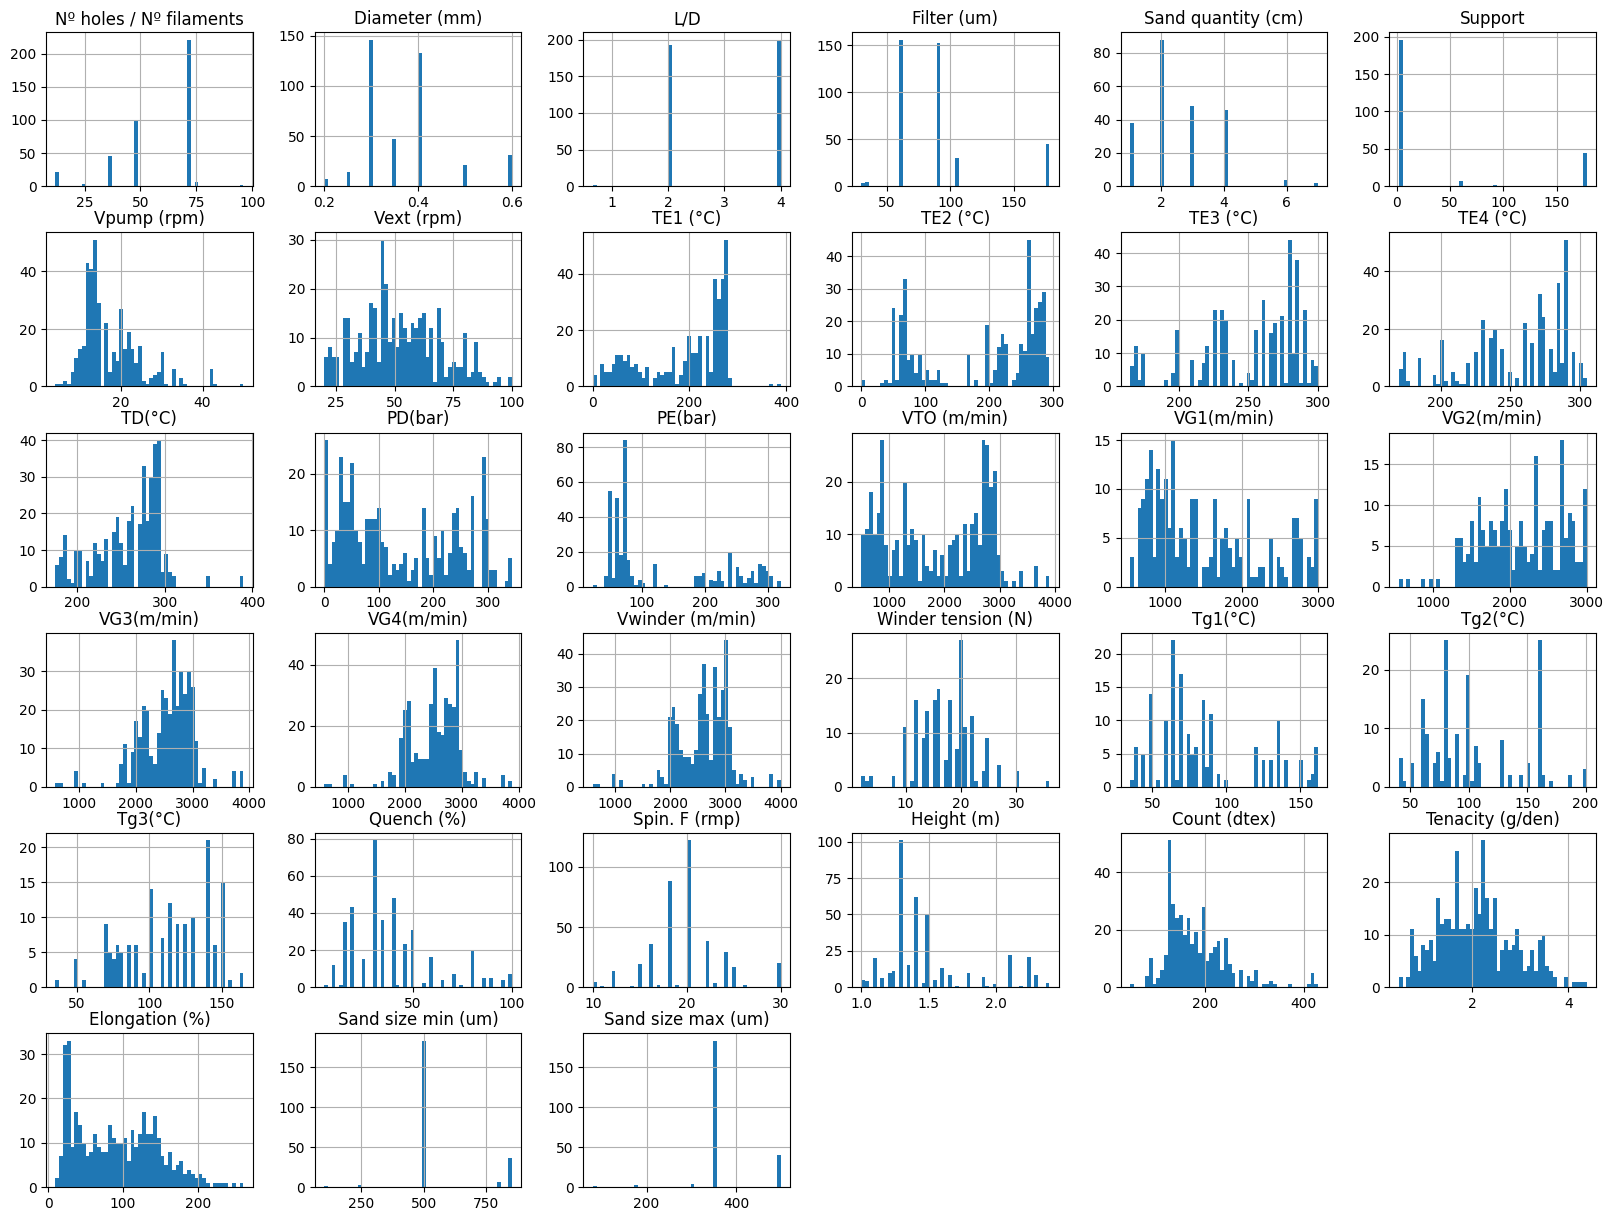

In [18]:
df.hist(bins=50, figsize=(20,15))

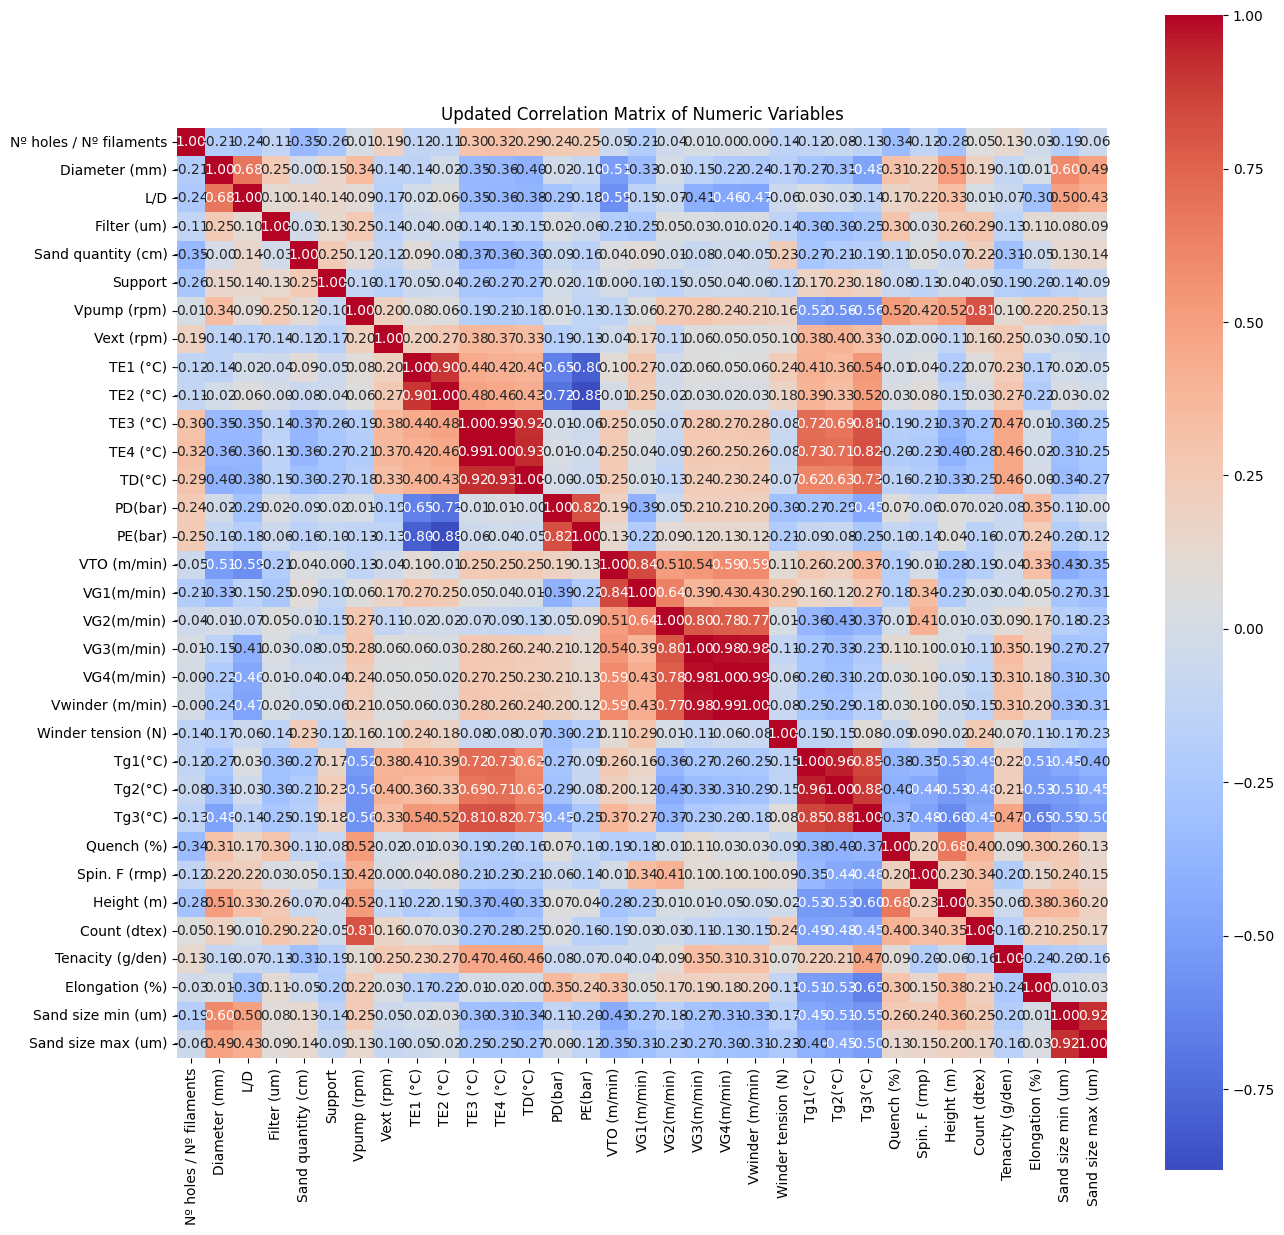

In [19]:
# Recalculate and display the correlation matrix after removing redundant columns
import seaborn as sns
updated_correlation_matrix = df.select_dtypes(include=['float64', 'int64', 'bool']).corr()

# Plot the updated correlation heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(updated_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Updated Correlation Matrix of Numeric Variables")
plt.show()


In [20]:
# Identify the strongest correlations (ignoring self-correlations)
# Sort by absolute correlation values in descending order
correlation_matrix = updated_correlation_matrix
strongest_correlations = (
    correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    .stack()
    .abs()
    .sort_values(ascending=False)
)

# Filter for only the strongest correlations (above a threshold, e.g., > 0.7)
strongest_correlations = strongest_correlations[strongest_correlations > 0.89]

# Display the result
strongest_correlations
df_strongest_correlations = pd.DataFrame(strongest_correlations, columns=['Correlation'])

In [21]:
strongest_correlations

TE3 (°C)            TE4 (°C)              0.993887
VG4(m/min)          Vwinder (m/min)       0.993228
VG3(m/min)          VG4(m/min)            0.983616
                    Vwinder (m/min)       0.977345
Tg1(°C)             Tg2(°C)               0.955686
TE4 (°C)            TD(°C)                0.932404
TE3 (°C)            TD(°C)                0.923336
Sand size min (um)  Sand size max (um)    0.915288
TE1 (°C)            TE2 (°C)              0.902357
dtype: float64

In [22]:
df_strongest_correlations

Correlation
TE3 (°C)           TE4 (°C)               0.993887
VG4(m/min)         Vwinder (m/min)        0.993228
VG3(m/min)         VG4(m/min)             0.983616
                   Vwinder (m/min)        0.977345
Tg1(°C)            Tg2(°C)                0.955686
TE4 (°C)           TD(°C)                 0.932404
TE3 (°C)           TD(°C)                 0.923336
Sand size min (um) Sand size max (um)     0.915288
TE1 (°C)           TE2 (°C)               0.902357

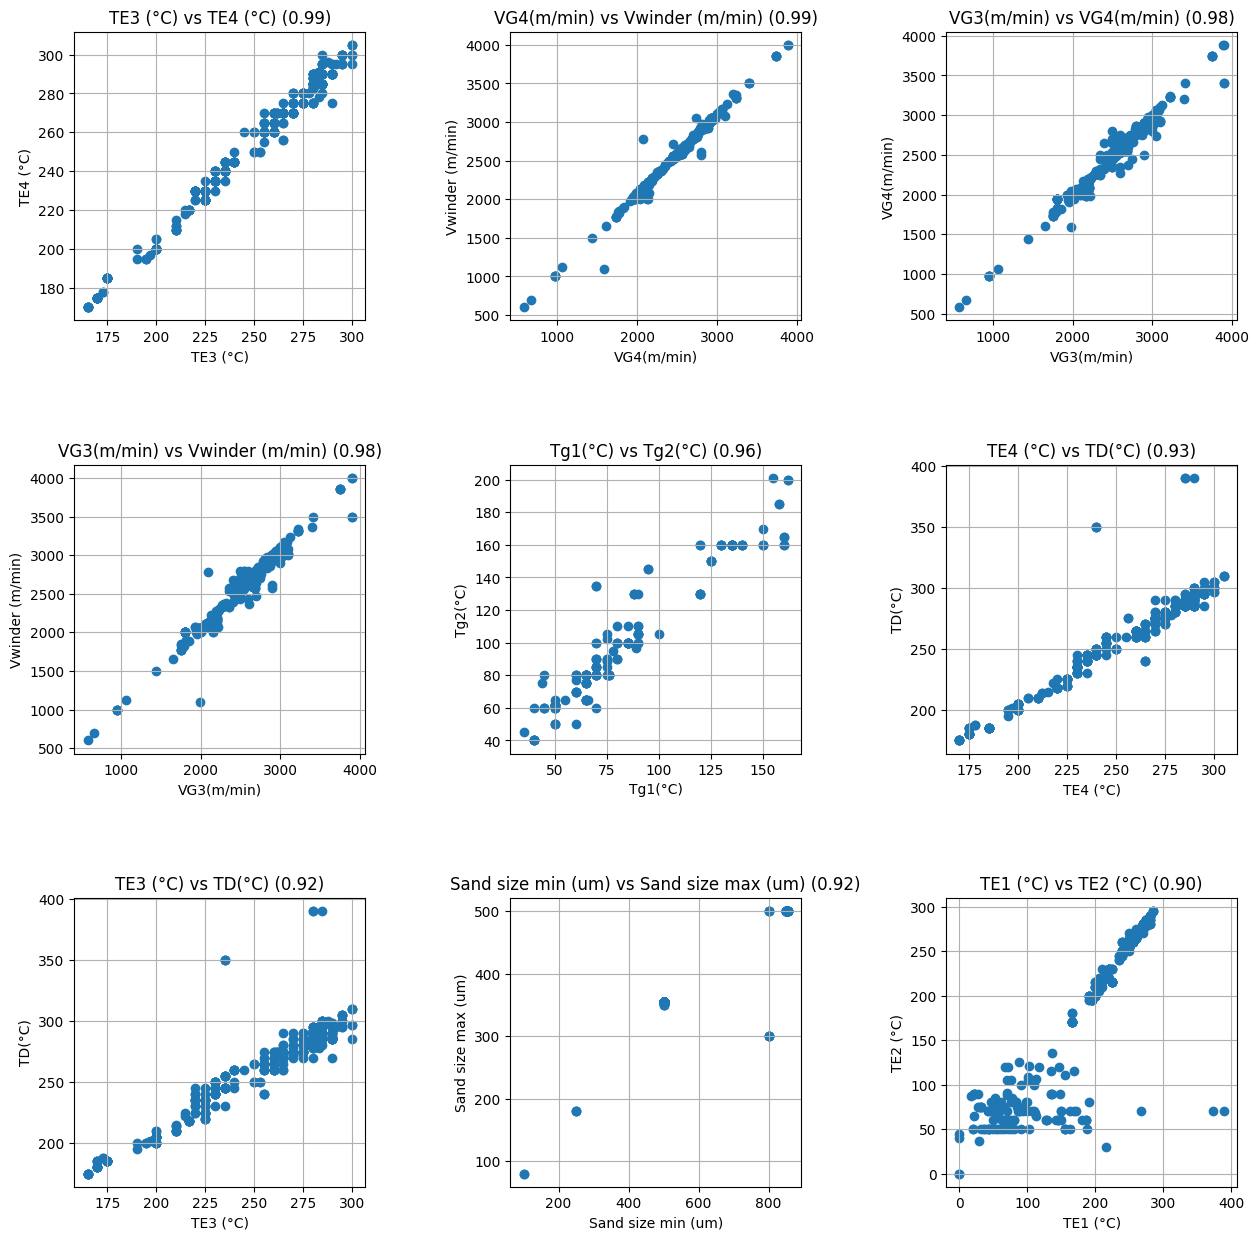

In [23]:
# xy plots of the strongest correlations

plt.figure(figsize=(15, 15))
# padding
plt.subplots_adjust(hspace=0.5, wspace=0.5)
n = len(strongest_correlations)
nsq = int(np.ceil(np.sqrt(n)))
for i, (corr, value) in enumerate(strongest_correlations.items()):
    plt.subplot(nsq, nsq, i + 1)
    x, y = corr
    plt.scatter(df[x], df[y])
    plt.title(f"{x} vs {y} ({value:.2f})")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)


In [24]:
# # Identify columns to keep for each group of strongly correlated variables (keeping one representative)
# TE3 (°C) - TE4 (°C) - TD(°C)
# VG4(m/min) - Vwinder (m/min) - VG3(m/min)
# Tg1(°C) - Tg2(°C)
# TE1 (°C) – TE2 (°C)
# Sand size min (um) - Sand size max (um) 

columns_to_keep = {
    "TE3 (°C)": ["TE4 (°C)", "TD(°C)"],
    "VG4(m/min)": ["Vwinder (m/min)", "VG3(m/min)"],
    "Tg1(°C)": ["Tg2(°C)"],
    "TE1 (°C)": ["TE2 (°C)"],
    "Sand size min (um)": ["Sand size max (um)"]
}

# Drop the columns to keep only one representative for each group of strongly correlated variables
df.drop(columns=[col for cols in columns_to_keep.values() for col in cols], inplace=True)


In [25]:
# nan -> mean
# 
df.columns

Index(['Date', 'Test', 'Material', 'Nº holes / Nº filaments', 'Diameter (mm)',
       'L/D', 'Filter (um)', 'Sand quantity (cm)', 'Support', 'Vpump (rpm)',
       'Vext (rpm)', 'TE1 (°C)', 'TE3 (°C)', 'PD(bar)', 'PE(bar)',
       'VTO (m/min)', 'VG1(m/min)', 'VG2(m/min)', 'VG4(m/min)',
       'Winder tension (N)', 'Tg1(°C)', 'Tg3(°C)', 'Quench (%)',
       'Spin. F (rmp)', 'Height (m)', 'Count (dtex)', 'Tenacity (g/den)',
       'Elongation (%)', 'Sand size min (um)'],
      dtype='object')

In [26]:
#pop Date,Test,Material
remove = ["Date","Test","Material"]
for col in remove:
    df.pop(col)

In [27]:
df = df.fillna(df.mean())

In [28]:
# PCA 
from sklearn.decomposition import PCA

# Define the features for PCA

features_all = df.select_dtypes(include=['float64', 'int64', 'bool']).dropna(axis=1)
# pop tenacity, elongation and dcount because they are the target variables
features_all.pop("Tenacity (g/den)")
features_all.pop("Elongation (%)")
features_all.pop("Count (dtex)")

# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features_all)

# Perform PCA
# 
pca = PCA()
features_pca = pca.fit_transform(features_standardized)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_, ".-")
plt.title("Explained Variance Ratio")
plt.xlabel("Principal Component")
plt.ylabel("Ratio")
plt.grid(True)


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
features_all

,Nº holes / Nº filaments,Diameter (mm),L/D,Filter (um),Sand quantity (cm),Support,Vpump (rpm),Vext (rpm),TE1 (°C),TE3 (°C),...,VG1(m/min),VG2(m/min),VG4(m/min),Winder tension (N),Tg1(°C),Tg3(°C),Quench (%),Spin. F (rmp),Height (m),Sand size min (um)
0,36.0,0.4,4.0,60.0,2.566372,4.000,10.0,23.9,280.0,285.0,...,1005.000000,1701.000000,1780,17.197917,85.000000,110.000000,20.000000,24.0,1.40,558.340517
2,48.0,0.4,4.0,60.0,2.000000,2.000,10.7,30.2,280.0,280.0,...,999.000000,1751.000000,1834,14.000000,85.000000,80.000000,30.000000,24.0,1.50,850.000000
3,48.0,0.4,4.0,60.0,2.000000,2.000,10.7,30.7,280.0,280.0,...,999.000000,1909.000000,1991,14.000000,85.000000,90.000000,30.000000,24.0,1.50,850.000000
4,48.0,0.4,4.0,60.0,2.000000,2.000,10.7,30.7,280.0,280.0,...,999.000000,1989.000000,2167,14.000000,85.000000,90.000000,30.000000,24.0,1.50,850.000000
5,36.0,0.3,2.0,60.0,2.566372,36.016,15.0,50.0,225.0,220.0,...,2700.000000,2820.000000,2960,21.000000,85.838323,111.516129,20.000000,20.0,1.30,558.340517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,72.0,0.3,2.0,90.0,2.000000,2.000,19.5,43.0,50.0,225.0,...,1524.826271,2152.605932,2550,17.197917,85.838323,111.516129,40.000000,20.0,1.65,500.000000
418,72.0,0.3,2.0,90.0,2.000000,2.000,19.5,41.0,50.0,225.0,...,1524.826271,2152.605932,2570,17.197917,85.838323,111.516129,40.000000,20.0,1.65,500.000000
419,72.0,0.3,2.0,90.0,2.000000,2.000,13.0,70.0,69.3,280.0,...,1524.826271,2152.605932,2837,13.000000,85.838323,111.516129,39.199495,18.0,1.50,500.000000
420,72.0,0.3,2.0,90.0,2.000000,2.000,14.0,45.0,154.8,295.0,...,1524.826271,2152.605932,2837,22.000000,85.838323,111.516129,10.000000,16.0,1.60,500.000000


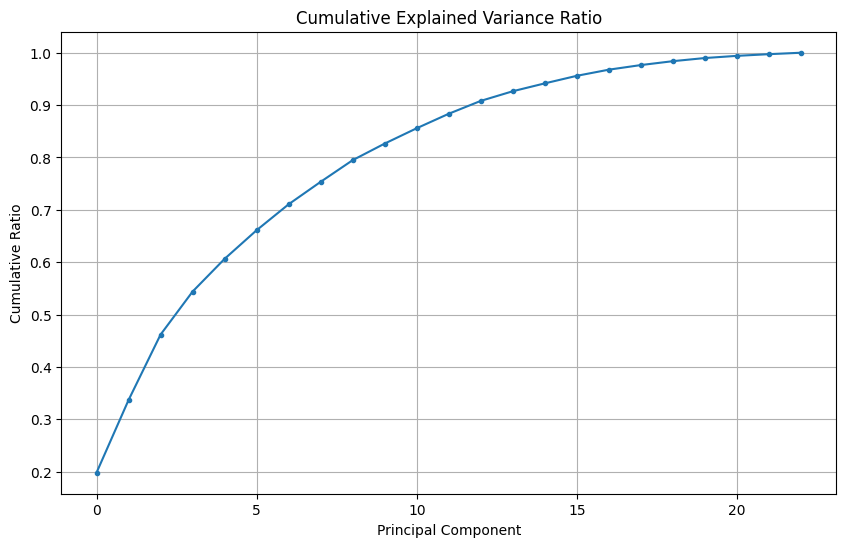

In [ ]:
# plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), ".-")
plt.title("Cumulative Explained Variance Ratio")

plt.xlabel("Principal Component")
plt.ylabel("Cumulative Ratio")

plt.grid(True)

In [ ]:
# Eigenvectors
eigenvectors = pca.components_

# Display the eigenvectors
df_eigenvectors = pd.DataFrame(eigenvectors, columns=features_all.columns)

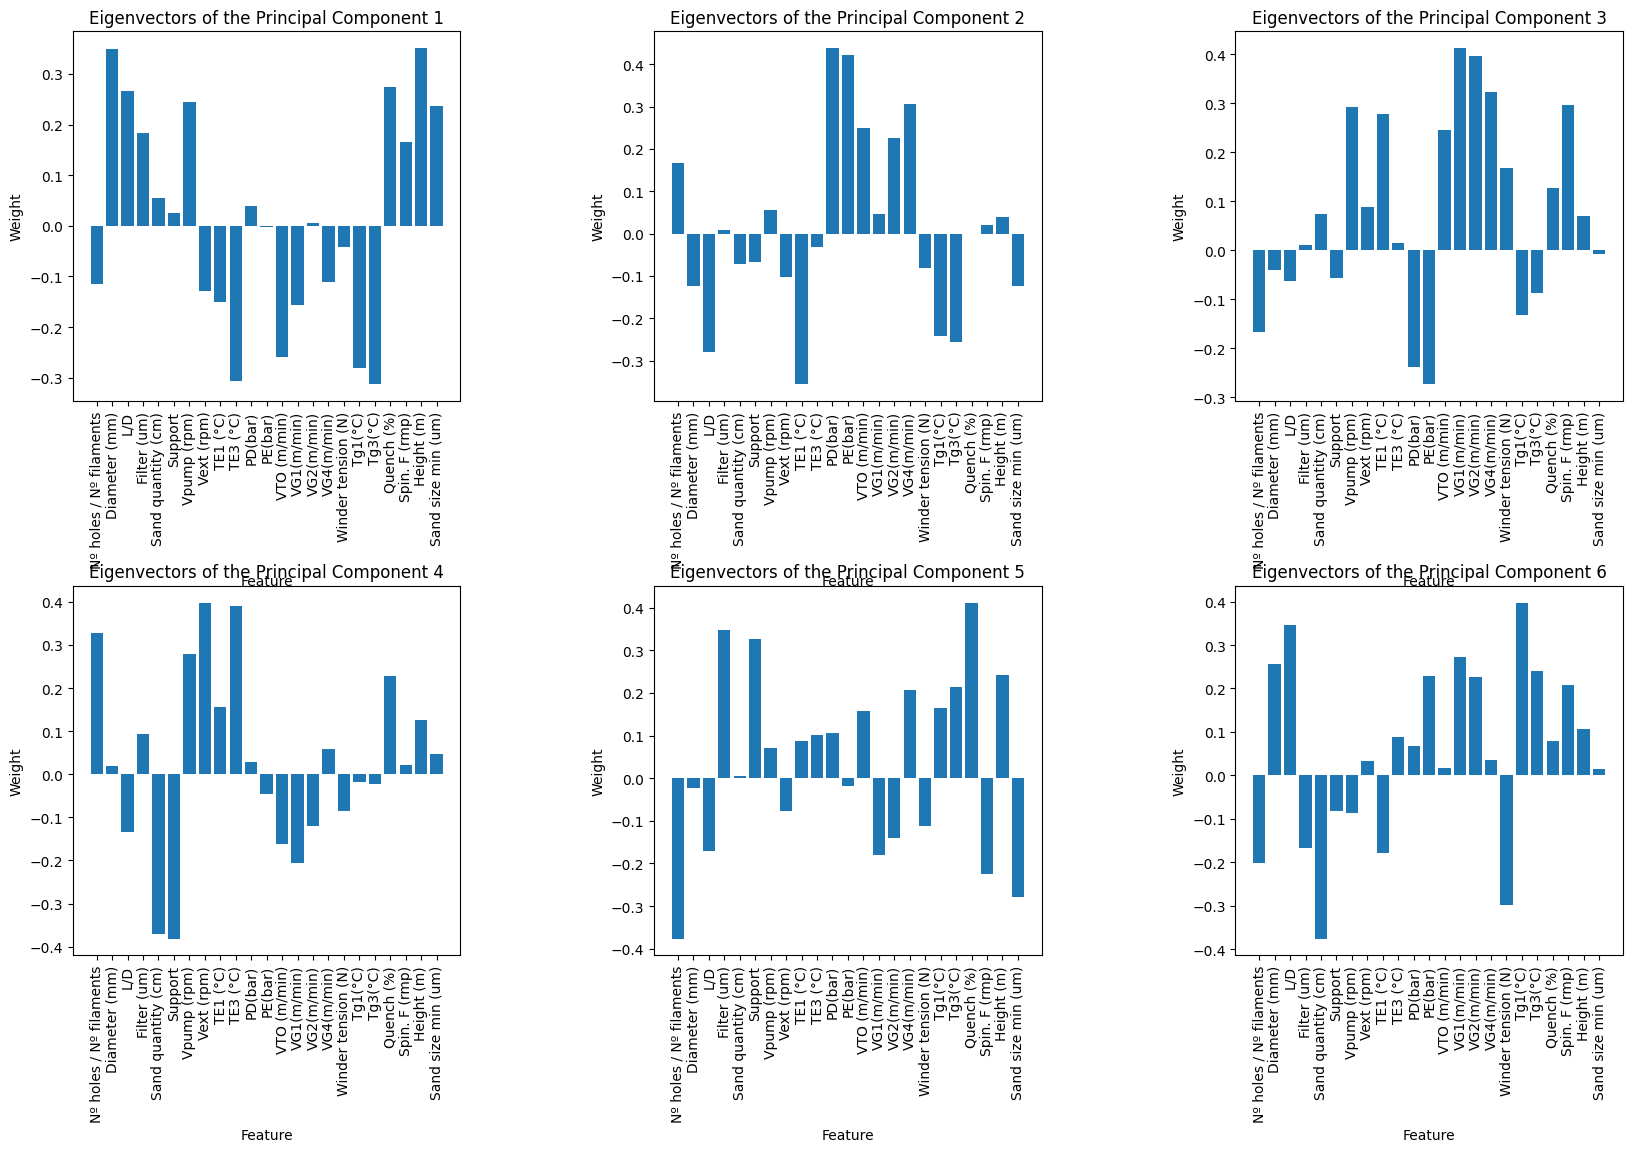

In [ ]:
# Display the eigenvectors
fig = plt.figure(figsize=(20, 12))
# padding
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.bar(features_all.columns, eigenvectors[i])
    plt.title(f"Eigenvectors of the Principal Component {i + 1}")
    plt.xlabel("Feature")
    plt.ylabel("Weight")
    plt.xticks(rotation=90)